
#**Experiment Case 5: Prediction of CO2 Emissions using Regression Models**  
Original owner and performed by - Kaustubh Yewale      
  

Feel free to reach me!  
GitHub link: https://github.com/Kaustubh5352  
LinkedIn link: https://www.linkedin.com/in/kaustubh-yewale23/

**STEP 1 -** Load the dataset and do a preliminary review

In [ ]:
# Import the pandas library to load the data into a datframe
import pandas as pd

In [ ]:
# Load csv file to create dataframe
data = pd.read_csv('/content/drive/MyDrive/DAL Practical/Practical 6/CO2 Emissions_Canada - CO2 Emissions_Canada.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Review few dataframe observations to get an understanding of the dataset
data.head()


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
# Check dataset dimensions. Our dataset consists of 7,385 observationsa and 12 features.
print(data.shape)
print()
# We further check the features in the dataset along with thier data types.
print(data.dtypes)
# The dataset has 12 feautres which includes both continuous as well as categorical variables.


(7385, 12)

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object


**STEP 2 -** Perform Exploratory Data Analysis (EDA) on the dataset

In [ ]:
# Review summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [ ]:
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                                  Engine Size(L)  Cylinders  \
Engine Size(L)                          1.000000   0.927653   
Cylinders                               0.927653   1.000000   
Fuel Consumption City (L/100 km)        0.831379   0.800702   
Fuel Consumption Hwy (L/100 km)         0.761526   0.715252   
Fuel Consumption Comb (L/100 km)        0.817060   0.780534   
Fuel Consumption Comb (mpg)            -0.757854  -0.719321   
CO2 Emissions(g/km)                     0.851145   0.832644   

                                  Fuel Consumption City (L/100 km)  \
Engine Size(L)                                            0.831379   
Cylinders                                                 0.800702   
Fuel Consumption City (L/100 km)                          1.000000   
Fuel Consumption Hwy (L/100 km)                           0.948180   
Fuel Consumption Comb (L/100 km)                          0.993810   
Fuel Consumption Comb (mpg)                              -0.927059   
CO2 E

Text(0.5, 1.0, 'Correlations Between Various Vehicle Feautures')

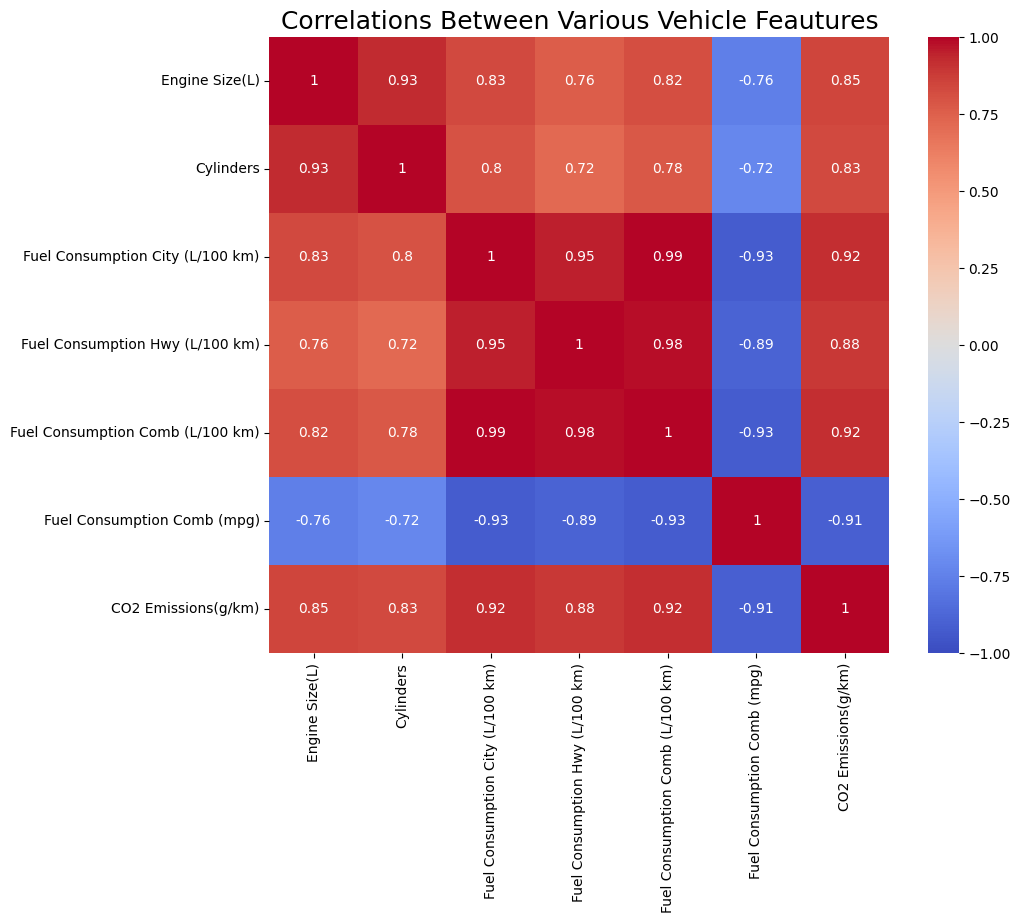

In [ ]:
## Visualizing correlations
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])
corr = numeric_data.corr()

import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr, cmap="coolwarm", center=0, annot = True, vmin= -1, vmax = 1)
ax.set_title("Correlations Between Various Vehicle Feautures", size=18)

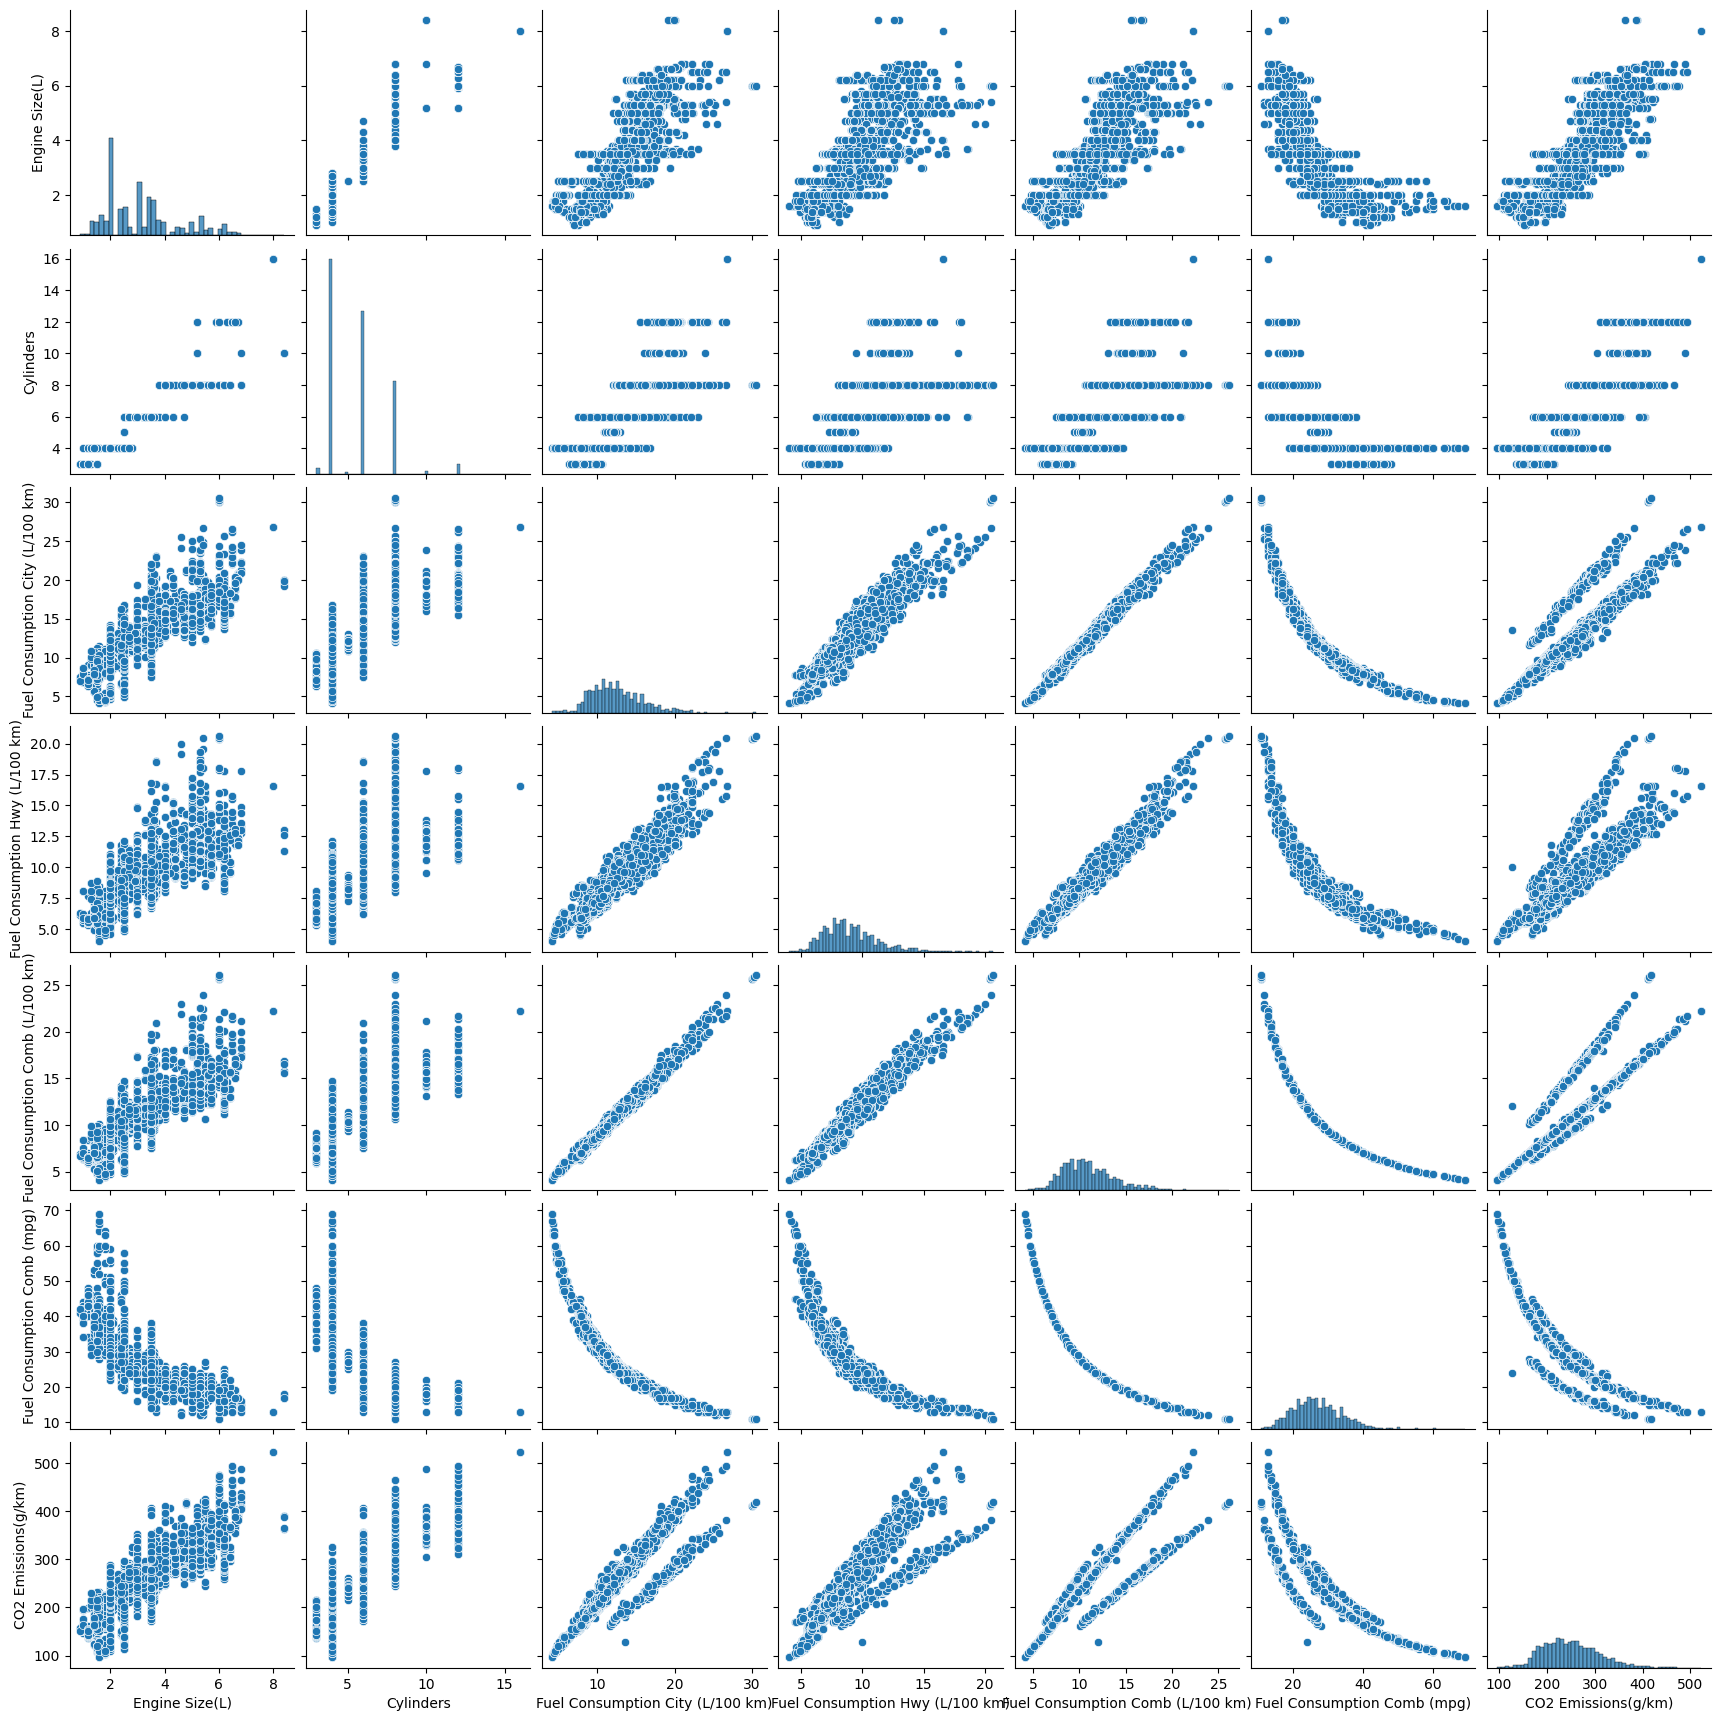

In [ ]:
#Exploring Realitionships among the continues Features
sns.pairplot(data, kind ="scatter")
plt.show()

<Axes: >

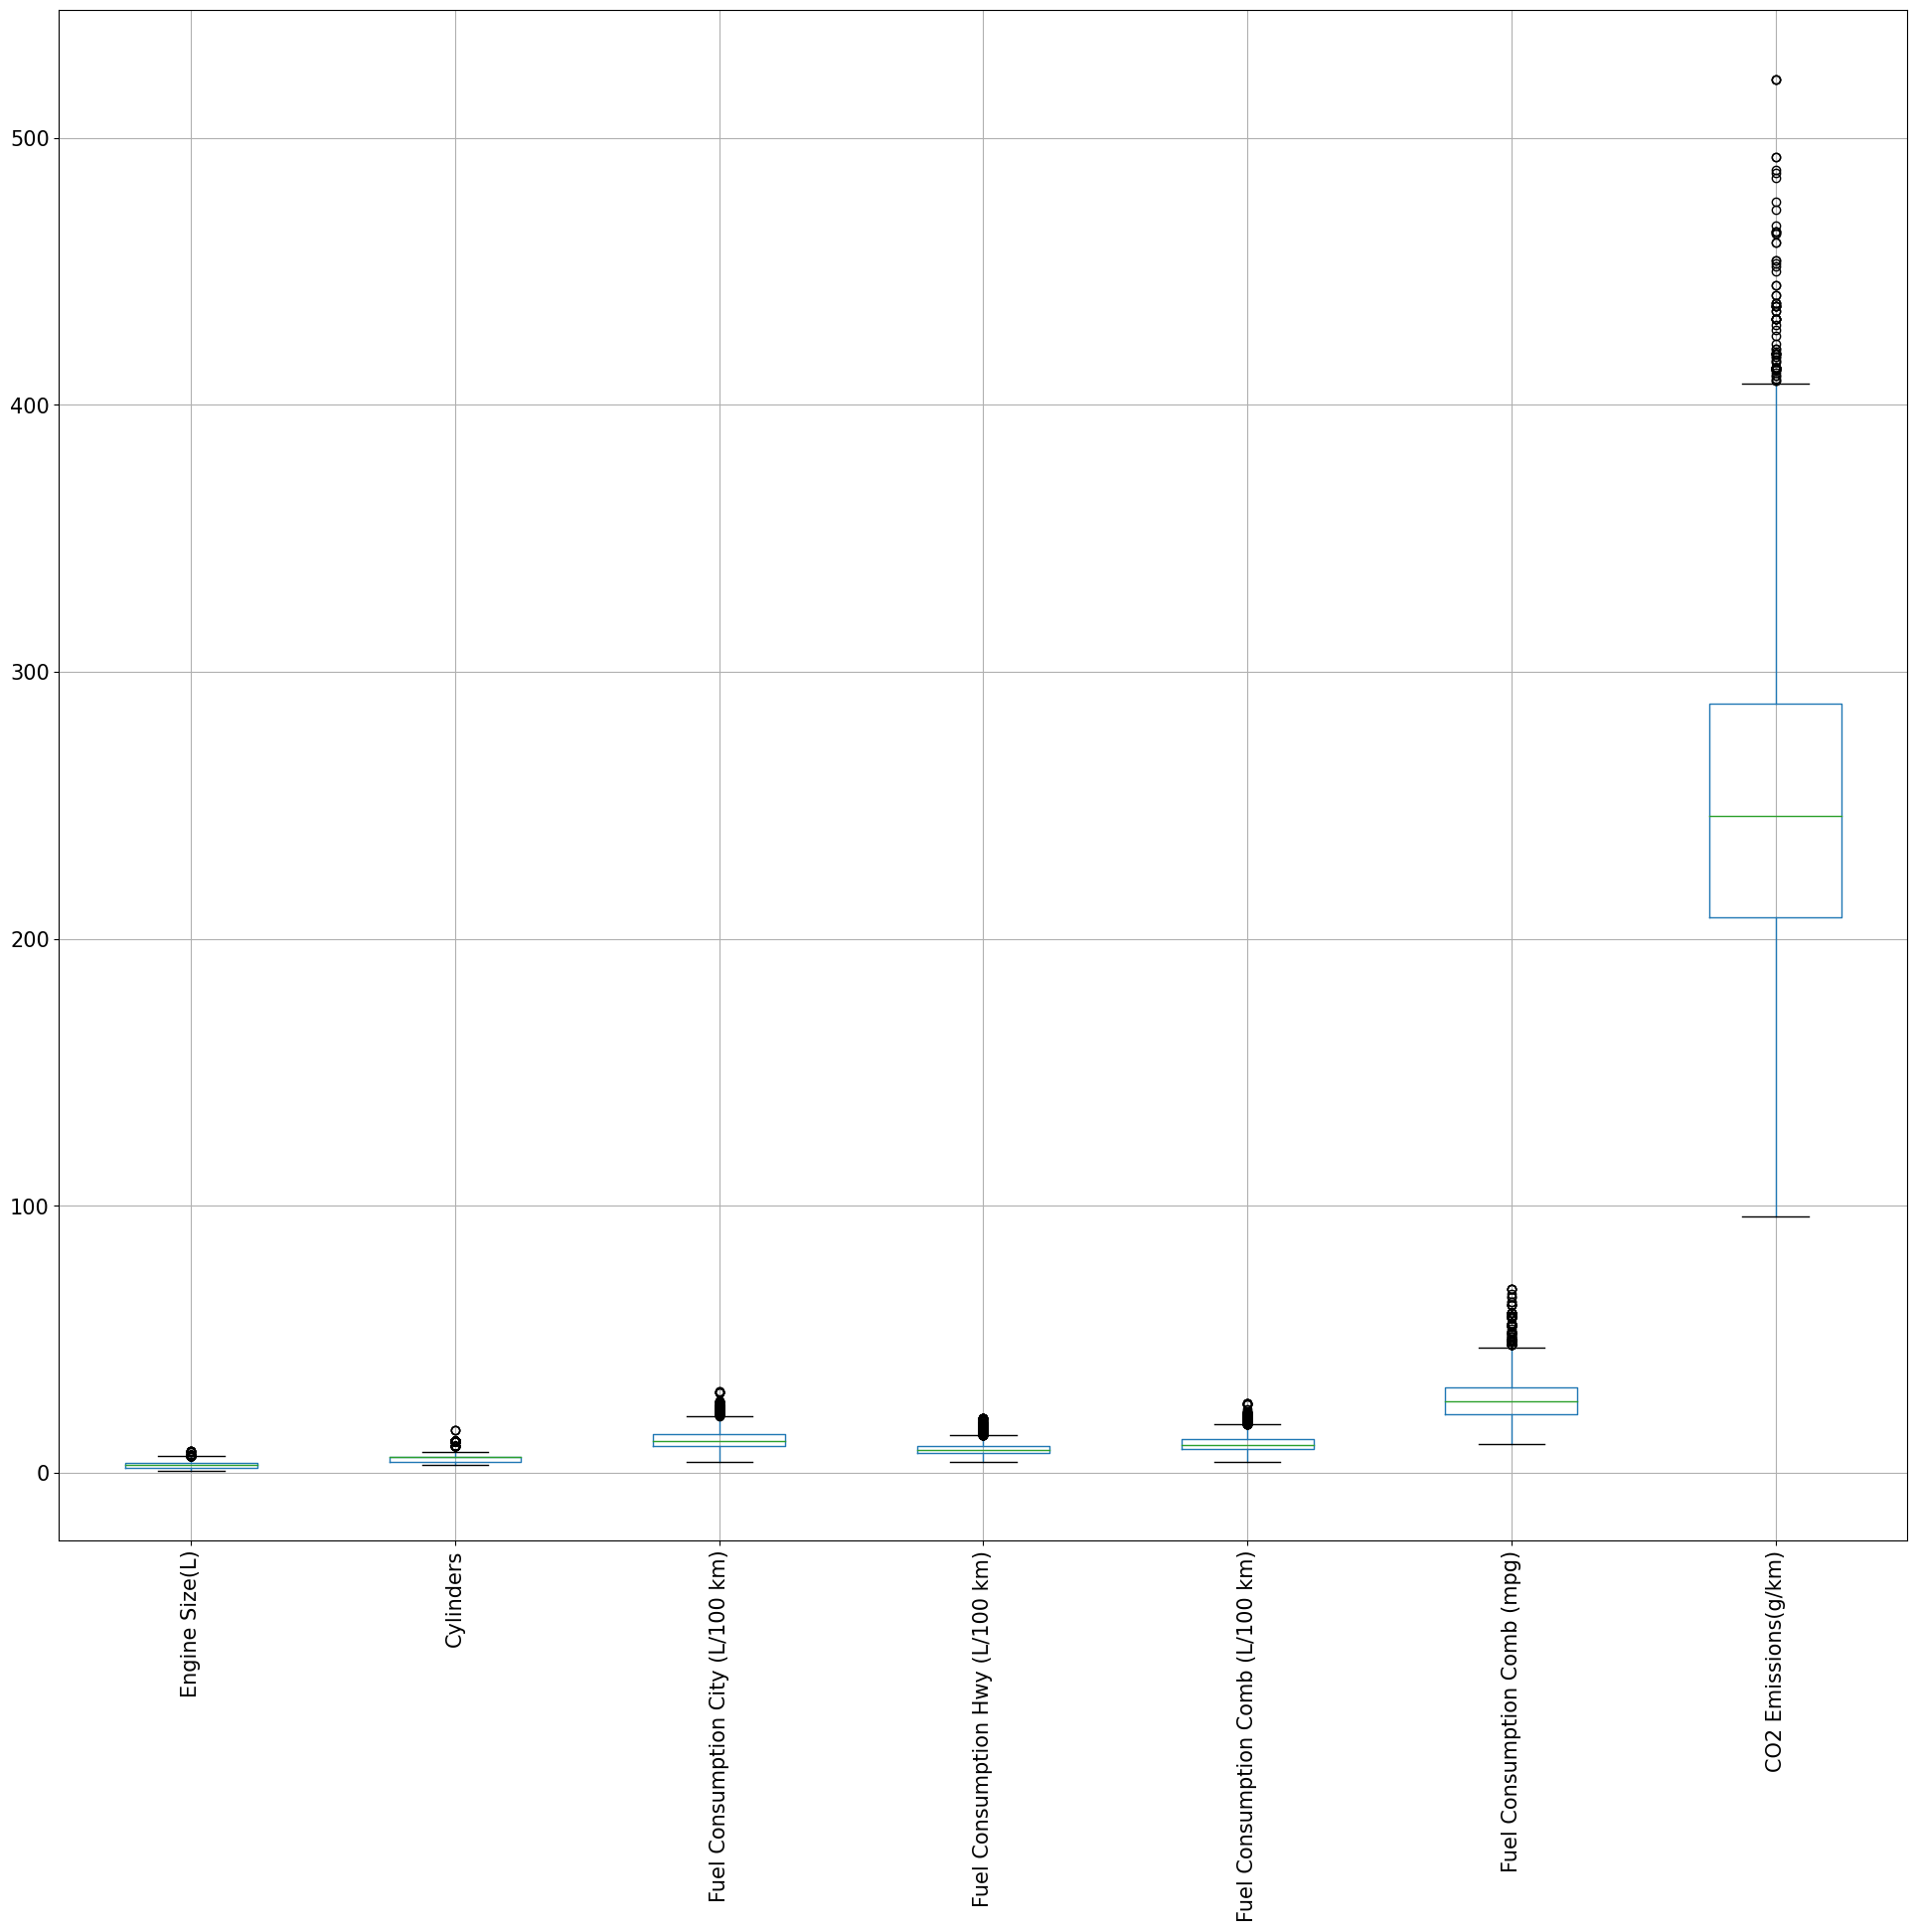

In [ ]:
# Exploring outliers
data.boxplot (figsize=(24,20), rot=90, fontsize = 15)

In [ ]:
# Analyzing categorical variables by creating a separate data frame of just categorical variables
categorical = data.select_dtypes('object')
categorical.shape


(7385, 5)

In [ ]:
categorical.nunique(axis=0)

,0
Make,42
Model,2048
Vehicle Class,16
Transmission,27
Fuel Type,5


In [ ]:
# Analyzing the unique values for the Fuel Type feature.
data['Fuel Type'].value_counts()

,count
Fuel Type,
X,3637
Z,3202
E,370
D,175
N,1


**STEP 3** - Preprocess the dataset for modeling


In [ ]:
# Removing high cardinarly variables and create a new dataframe
mod_data = data.copy()
mod_data = mod_data.drop(labels =['Make', 'Model', 'Transmission', 'Vehicle Class'], axis=1)
mod_data.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,Z,9.9,6.7,8.5,33,196
1,2.4,4,Z,11.2,7.7,9.6,29,221
2,1.5,4,Z,6.0,5.8,5.9,48,136
3,3.5,6,Z,12.7,9.1,11.1,25,255
4,3.5,6,Z,12.1,8.7,10.6,27,244


In [ ]:
# Performing one hot encoding for Fuel Type
category = ['Fuel Type']
for column in category:
    tempdf = pd.get_dummies (mod_data[column], prefix=column)
    mod_data = pd.merge(
        left=mod_data,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    mod_data = mod_data.drop(columns=column)

In [ ]:
# Analyze shape of new data frame
print (mod_data.shape)


(7385, 12)


In [ ]:
# Analyze columns of new data frame
print(mod_data.columns)

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'Fuel Type_D',
       'Fuel Type_E', 'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z'],
      dtype='object')


In [ ]:
# Analyze few observations of new data frame
mod_data.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,False,False,False,False,True
1,2.4,4,11.2,7.7,9.6,29,221,False,False,False,False,True
2,1.5,4,6.0,5.8,5.9,48,136,False,False,False,False,True
3,3.5,6,12.7,9.1,11.1,25,255,False,False,False,False,True
4,3.5,6,12.1,8.7,10.6,27,244,False,False,False,False,True


In [ ]:
# Checking dataset for missing values
mod_data.isna ().sum()

,0
Engine Size(L),0
Cylinders,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0
Fuel Consumption Comb (mpg),0
CO2 Emissions(g/km),0
Fuel Type_D,0
Fuel Type_E,0
Fuel Type_N,0


The dataset is robust and does not have any missing values.

**STEP 4** - Building the model

In [ ]:
# All features in the dataframe
mod_data.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'Fuel Type_D',
       'Fuel Type_E', 'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z'],
      dtype='object')

In [ ]:

# Creating a new dataframe for the target variable
target = mod_data[['CO2 Emissions(g/km)']]

# Printing the shape of the target dataframe
print(target.shape)
print()

# Displaying the first few rows of the target dataframe
print(target.head())

(7385, 1)

   CO2 Emissions(g/km)
0                  196
1                  221
2                  136
3                  255
4                  244


In [ ]:
# Create a dataframe for predictor variables by dropping the target variable column
predictors = mod_data.drop(['CO2 Emissions(g/km)'], axis=1)

# Print the shape of the predictors dataframe
print(predictors.shape)

# Print an empty line
print()

# Display the first few rows of the predictors dataframe
print(predictors.head())

(7385, 11)

   Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0             2.0          4                               9.9   
1             2.4          4                              11.2   
2             1.5          4                               6.0   
3             3.5          6                              12.7   
4             3.5          6                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  Fuel Type_D  Fuel Type_E  Fuel Type_N  \
0                           33        False        False        False   
1           

In [ ]:
# Express target and predictors in terms of X and Y for modeling
Y=target
X=predictors

In [ ]:
# Split the dataset into training and testing datasets. We will train the model on 80% of the dataset and perform
# predictions on the remaining 20%
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# Review training data shape
X_train.shape, Y_train.shape

((5908, 11), (5908, 1))

In [ ]:
# Review test data shape
X_test.shape, Y_test.shape

((1477, 11), (1477, 1))

In [ ]:
# Define the regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# Fit the model on the training datset
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Make predictions on the test dataset
Y_pred = model.predict(X_test)

In [ ]:
# Extracting model coefficients
model.coef_


array([[  0.19888371,   1.12301113,   6.78326011,   5.61519161,
          7.63201018,  -0.84305264,  62.14444199, -75.94154118,
        -49.41966264,  31.9525331 ,  31.26422873]])

In [ ]:
# Reviewing features for above coefficients
X_test.columns


Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'Fuel Type_D', 'Fuel Type_E',
       'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z'],
      dtype='object')

**Model Results**

In [ ]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error (Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('Coefficient of Determination/ R Squared:', metrics.r2_score (Y_test, Y_pred))

Mean Absolute Error: 2.968875742830978
Mean Squared Error: 25.97613682026736
Root Mean Squared Error: 5.096678999139279
Coefficient of Determination/ R Squared: 0.9928083437554597


**Conclusion:-**From the model performance metrics, it appears that 99% of the variance in the CO2 Emissions can be determined by the features within our model. While this model has good performance, we simplified the model by omitting several key categorical variables. It would be interesting to see if there is way to retain them within the model, and gain further insights.